<a href="https://colab.research.google.com/github/mayaracsimoes/Resolvedor_Equacoes/blob/main/trabalho_geometria_analitica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Resolvedor de Equações de Circunferências e Elipses

Membros do grupo: Daniel, Gustavo e Mayara.

##1. Circunferências

### 1.1 Fundamentação Matemática

A equação geral de uma circunferência no plano cartesiano é:

$$
x^2 + y^2 + Dx + Ey + F = 0
$$

Onde:
- **$x, y$**: Variáveis que representam as coordenadas de qualquer ponto da circunferência
- **$D$**: Coeficiente que controla o deslocamento horizontal do centro
- **$E$**: Coeficiente que controla o deslocamento vertical do centro
- **$F$**: Termo independente que afeta o tamanho e existência da circunferência

Completando os quadrados:

1. Para os termos em $x$:
   $$
   x^2 + Dx = \left(x + \frac{D}{2}\right)^2 - \frac{D^2}{4}
   $$

2. Para os termos em $y$:
   $$
   y^2 + Ey = \left(y + \frac{E}{2}\right)^2 - \frac{E^2}{4}
   $$

3. Forma canônica resultante:
   $$
   \left(x - h\right)^2 + \left(y - k\right)^2 = r^2
   $$
   Onde:
   - **Centro**: $(h, k) = \left(-\frac{D}{2}, -\frac{E}{2}\right)$
   - **Raio**: $r = \sqrt{h^2 + k^2 - F}$

Condições de Existência:

*   $h^2 + k^2 - F > 0$: Circunferência real
*   $h^2 + k^2 - F = 0$: Ponto único (degenerado)
*   $h^2 + k^2 - F < 0$: Sem solução real
<br/>
<br/>
---

###1.2 Desenvolvimento do código


In [ ]:
import math

def analisar_circunferencia(D, E, F):
    """
    Analisa a equação geral da circunferência.

    Parâmetros:
        D, E, F (float): Coeficientes da equação

    Retorna:
        dict: Dicionário com características geométricas
    """
    # Cálculo do centro
    h = -D/2
    k = -E/2

    # Cálculo do raio
    try:
        raio = math.sqrt(h**2 + k**2 - F)
        if raio > 0:
            return {
                "Tipo": "Circunferência real",
                "Centro": (h, k),
                "Raio": raio,
                "Equação Reduzida": f"(x - {h:.2f})² + (y - {k:.2f})² = {raio**2:.2f}"
            }
        elif raio == 0:
            return {
                "Tipo": "Ponto degenerado",
                "Centro": (h, k),
                "Raio": 0
            }
    except ValueError:
        return {
            "Tipo": "Sem solução real",
            "Centro": (h, k),
            "Observação": "Raio imaginário"
        }

Exemplo de uso:

In [ ]:
print(analisar_circunferencia(-4, 6, -3))  # Circunferência real
print(analisar_circunferencia(-2, 4, 5))   # Ponto degenerado
print(analisar_circunferencia(0, 0, 1))    # Sem solução real

{'Tipo': 'Circunferência real', 'Centro': (2.0, -3.0), 'Raio': 4.0, 'Equação Reduzida': '(x - 2.00)² + (y - -3.00)² = 16.00'}
{'Tipo': 'Ponto degenerado', 'Centro': (1.0, -2.0), 'Raio': 0}
{'Tipo': 'Sem solução real', 'Centro': (0.0, 0.0), 'Observação': 'Raio imaginário'}


Exemplos de Aplicação:

* Caso Real (Circunferência Válida)

> Equação: $x^2 + y^2 -4x +6y -3 = 0$

**Saída**:
```python
{
    'Tipo': 'Circunferência real',
    'Centro': (2.0, -3.0),
    'Raio': 4.0,
    'Equação Reduzida': '(x - 2.00)² + (y - -3.00)² = 16.00'
}
```

* Caso Degenerado

> Equação: $x^2 + y^2 -2x +4y +5 = 0$



**Saída**:
```python
{
    'Tipo': 'Ponto degenerado',
    'Centro': (1.0, -2.0),
    'Raio': 0
}
```

Visualização Gráfica:

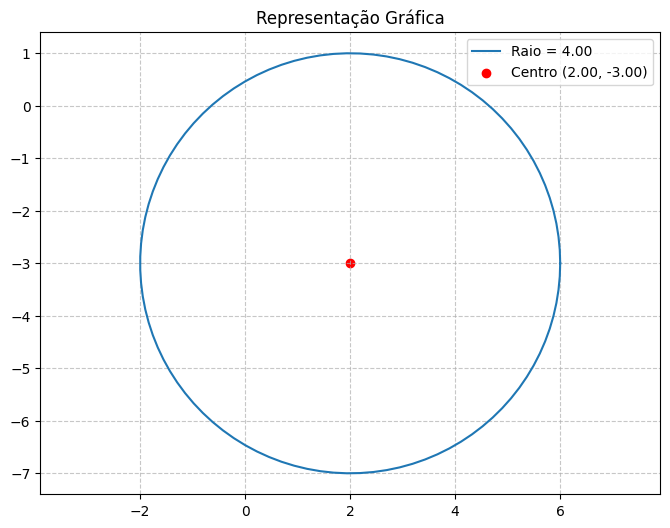

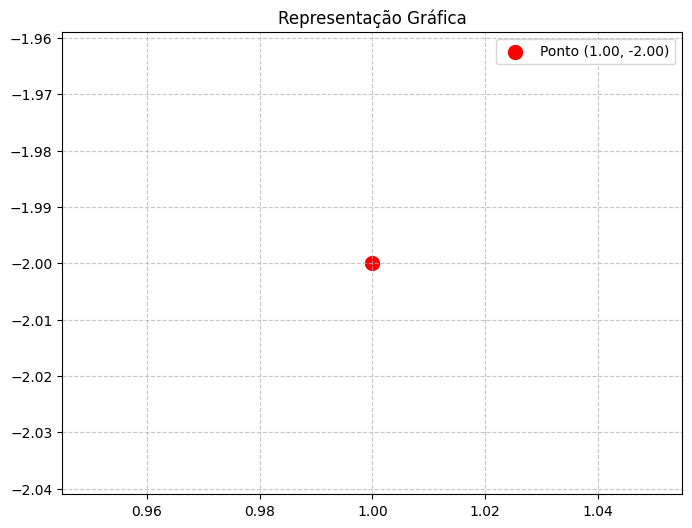

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_circunferencia(h, k, r):
    plt.figure(figsize=(8,6))
    if r > 0:
        theta = np.linspace(0, 2*np.pi, 100)
        x = h + r * np.cos(theta)
        y = k + r * np.sin(theta)
        plt.plot(x, y, label=f'Raio = {r:.2f}')
        plt.scatter(h, k, color='red', label=f'Centro ({h:.2f}, {k:.2f})')
    else:
        plt.scatter(h, k, color='red', s=100, label=f'Ponto ({h:.2f}, {k:.2f})')

    plt.grid(True, linestyle='--', alpha=0.7)
    plt.axis('equal')
    plt.legend()
    plt.title('Representação Gráfica')
    plt.show()

# Exemplo de uso
plot_circunferencia(2.0, -3.0, 4.0)  # Circunferência
plot_circunferencia(1.0, -2.0, 0)    # Ponto

## 2. Elipses

### 2.1 Fundamentação Matemática

As elipses também seguem o formato de equação geral $Ax^2+By^2+Cx+Dy+E=0$, porém $A$ e $B$ precisam ser diferentes e não possuirem sinais opostos.

O formato de uma equação de elipse reduzida se segue da seguinte forma:

$\frac{(x-h)^2}{a^2}+\frac{(y-k)^2}{b^2} = 1$ caso o eixo maior seja $\parallel$ ao eixo $x$,
ou $\frac{(x-h)^2}{b^2}+\frac{(y-k)^2}{a^2} = 1$ caso o eixo maior seja $\parallel$ ao eixo $y$.

Para desenvolver o algorítmo é necessário generalizar o processo de transformar a equação geral em reduzida, e para isso foram feitas as seguintes manipulações algebricas:

Inicialmente se tem a equação geral:
$$
Ax^2+By^2+Cx+Dy+E=0
$$
Em primeiro lugar se deve agrupar os termos multiplicados por $x$ e por $y$:
$$
Ax^2+Cx+By^2+Dy+E=0
$$
Para que se possa completar os quadrados é possível necessário evidenciar o $A$ e o $B$ em suas respectivas equações (com $A$ e $B$ $\neq$ $0$, para não ocorrer divisão por 0):
$$
A\left(x^2 + \frac{Cx}{A}\right) + B\left(y^2 + \frac{Dy}{B}\right) = -E
$$
Então continua-se completando os quadrados, inicialmente completa-se os quadrados do termos com $x$:
$$
x^2+\frac{Cx}{A}=\left(x+\frac{C}{2A}\right)^2-\left(\frac{C}{2A}\right)^2
$$
Então se completa os quadrados dos termos com $y$:
$$
y^2+\frac{Dy}{B}=\left(y+\frac{D}{2B}\right)^2-\left(\frac{D}{2B}\right)^2
$$
Substituindo na fórmula e distribuindo $A$ e $B$:
$$
A\left(x+\frac{C}{2A}\right)^2-A\left(\frac{C}{2A}\right)^2+B\left(y+\frac{D}{2B}\right)^2-B\left(\frac{D}{2B}\right)^2 = -E
$$
Agora se isolam os termos que possuem $x$ e $y$ na esquerda:
$$
A\left(x+\frac{C}{2A}\right)^2+B\left(y+\frac{D}{2B}\right)^2 = A\left(\frac{C}{2A}\right)^2 + B\left(\frac{D}{2B}\right)^2 - E
$$
Como na fórmula da elipse o único termo na direita é $1$, se faz necessário dividir todos os termos pelo lado direito:
$$
\frac{A\left(x+\frac{C}{2A}\right)^2}{A\left(\frac{C}{2A}\right)^2 + B\left(\frac{D}{2B}\right)^2 - E}+\frac{B\left(y+\frac{D}{2B}\right)^2}{A\left(\frac{C}{2A}\right)^2 + B\left(\frac{D}{2B}\right)^2 - E}=1
$$
Para que a equação fique no formato esperado é necessário que se divida os nomiradores e denominadores dos termos de $x$ e $y$ por $A$ e $B$ respectivamente:
$$
\frac{\left(x+\frac{C}{2A}\right)^2}{\left(\frac{C}{2A}\right)^2 + \frac{B\left(\frac{D}{2B}\right)^2}{A} - \frac{E}{A}} +
\frac{\left(y+\frac{D}{2B}\right)^2}{\frac{A\left(\frac{C}{2A}\right)^2}{B} + \left(\frac{D}{2B}\right)^2 - \frac{E}{B}}=1
$$

Partindo desse formato é possível analisar a fórmula padrão da elipse (assumindo que a elipse ):
$$
\frac{(x-h)^2}{a^2}+\frac{(y-k)^2}{b^2} = 1
$$
Após observação da fórmula é possível determinar os termos importantes:
$$
h = -\frac{C}{2A} \\
k = -\frac{D}{2B} \\
a = max\left(\sqrt{h^2 + \frac{B k^2}{A} - \frac{E}{A}}, \sqrt{\frac{A h^2}{B} + k^2 - \frac{E}{B}} \right) \\
b = min\left( \sqrt{\frac{A h^2}{B} + k^2 - \frac{E}{B}}, \sqrt{ h^2 + \frac{B k^2}{A} - \frac{E}{A}} \right) \\
c = \sqrt{a^2-b^2}
$$

Após a determinação de $h$, $k$, $a$, $b$ é possível calcular os outros elementos. As definições usadas são:
A coordenada do centro:
$$
C(h, k)
$$

Eixo maior: $a$

Eixo menor: $b$

Coordendas do eixo maior:
$$
A_1 =
\begin{cases}
    (h - a, k), & \text{se a elipse é horizontal} \\
    (h, k - a), & \text{se a elipse é vertical}
\end{cases}
$$

$$
A_2 =
\begin{cases}
    (h + a, k), & \text{se a elipse é horizontal} \\
    (h, k + a), & \text{se a elipse é vertical}
\end{cases}
$$

Coordendas do eixo menor:
$$
B_1 =
\begin{cases}
    (h, k - b), & \text{se a elipse é horizontal} \\
    (h - b, k), & \text{se a elipse é vertical}
\end{cases}
$$

$$
B_2 =
\begin{cases}
    (h, k + b), & \text{se a elipse é horizontal} \\
    (h + b, k), & \text{se a elipse é vertical}
\end{cases}
$$


Coordenadas dos focos:
$$
F_1=
\begin{cases}
    (h-c,k), & \text{se a elipse é horizontal} \\
    (h,k-c), & \text{se a elipse é horizontal}
\end{cases}
$$

$$
F_2=
\begin{cases}
    (h+c,k), & \text{se a elipse é horizontal} \\
    (h,k+c), & \text{se a elipse é horizontal}
\end{cases}
$$

### 2.2 Desenvolvimento do Código

Considerando todas as demonstrações anteriores, seguimos com a implementação do
código.


(16)x² + (16)y² + (-28)x + (-128)y + (172) não representa uma elipse
############################
(0)x² + (16)y² + (-28)x + (-128)y + (172) não representa uma elipse
############################
(16)x² + (-5)y² + (-28)x + (-128)y + (172) não representa uma elipse
############################
Centro: (2.00, 4.00)
Semi-eixo maior (a): 4.00
Semi-eixo menor (b): 2.65
Excentricidade (e): 0.7500
Focos: {(5.0, 4.0), (-1.0, 4.0)}
Eixo maior paralelo ao eixo-x
Vértices do eixo maior: {(6.0, 4.0), (-2.0, 4.0)}
Vértices do eixo menor: {(2.0, 6.65), (2.0, 1.35)}


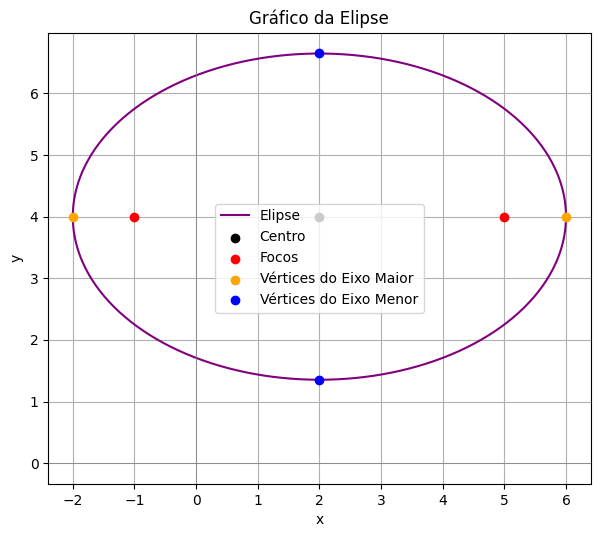

############################
Centro: (-1.00, 2.00)
Semi-eixo maior (a): 3.00
Semi-eixo menor (b): 2.00
Excentricidade (e): 0.7454
Focos: {(-1.0, -0.24), (-1.0, 4.24)}
Eixo maior paralelo ao eixo-y
Vértices do eixo maior: {(-1.0, -1.0), (-1.0, 5.0)}
Vértices do eixo menor: {(-3.0, 2.0), (1.0, 2.0)}


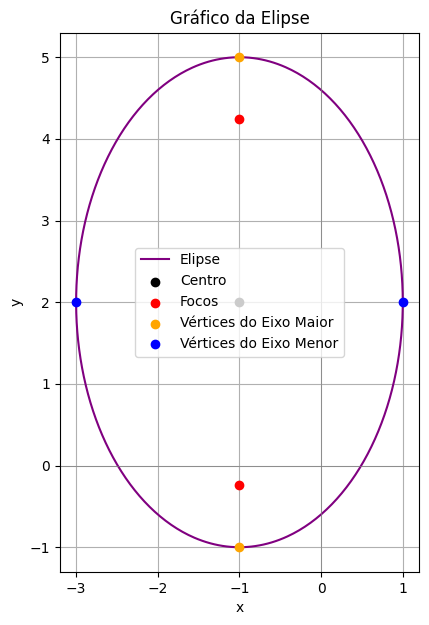

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from math import sqrt

def calcular_elispe(A: float, B: float, C: float, D: float, E: float):
    if A == B or A*B <= 0:
        print(f'({A})x² + ({B})y² + ({C})x + ({D})y + ({E})' +
              ' não representa uma elipse')
        return

    h = -C/(2*A)
    k = -D/(2*B)
    temp_a = sqrt(h**2 + ((B*k**2)/A) - E/A)
    temp_b = sqrt(((A*h**2)/B) + k**2 - E/B)
    if temp_a > temp_b:
        a = temp_a
        b = temp_b
        c = sqrt(a**2 - b**2)
        focos = {(round(h - c, 2), round(k, 2)),
                 (round(h + c, 2), round(k, 2))}
        eixo = 'x'
        vertices_a = {(round(h - a, 2), round(k, 2)),
                      (round(h + a, 2), round(k, 2))}
        vertices_b = {(round(h, 2), round(k - b, 2)),
                      (round(h, 2), round(k + b, 2))}
    else:
        b = temp_a
        a = temp_b
        c = sqrt(a**2 - b**2)
        focos = {(round(h, 2), round(k - c, 2)),
                 (round(h, 2), round(k + c, 2))}
        eixo = 'y'
        vertices_a = {(round(h, 2), round(k - a, 2)),
                      (round(h, 2), round(k + a, 2))}
        vertices_b = {(round(h - b, 2), round(k, 2)),
                      (round(h + b, 2), round(k, 2))}

    e = c / a

    print(f"Centro: ({h:.2f}, {k:.2f})")
    print(f"Semi-eixo maior (a): {a:.2f}")
    print(f"Semi-eixo menor (b): {b:.2f}")
    print(f"Excentricidade (e): {e:.4f}")
    print(f"Focos: {focos}")
    print(f"Eixo maior paralelo ao eixo-{eixo}")
    print(f"Vértices do eixo maior: {vertices_a}")
    print(f"Vértices do eixo menor: {vertices_b}")


    # Gráfico
    theta = np.linspace(0, 2 * np.pi, 500)
    if eixo == 'x':
        x_ellipse = h + a * np.cos(theta)
        y_ellipse = k + b * np.sin(theta)
    else:
        x_ellipse = h + b * np.cos(theta)
        y_ellipse = k + a * np.sin(theta)

    plt.figure(figsize=(7, 7))
    plt.plot(x_ellipse, y_ellipse, label='Elipse', color='purple')

    # Centro
    plt.scatter(h, k, color='black', label='Centro', zorder=5)
    # Focos
    plt.scatter(*zip(*focos), color='red', label='Focos', zorder=5)
    # Vértices
    plt.scatter(*zip(*vertices_a), color='orange',
                label='Vértices do Eixo Maior', zorder=5)
    plt.scatter(*zip(*vertices_b), color='blue',
                label='Vértices do Eixo Menor', zorder=5)

    plt.axhline(0, color='gray', linewidth=0.5)
    plt.axvline(0, color='gray', linewidth=0.5)
    plt.gca().set_aspect('equal')
    plt.grid(True)
    plt.legend()
    plt.title("Gráfico da Elipse")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

calcular_elispe(16, 16, -28, -128, 172)
print('############################')
calcular_elispe(0, 16, -28, -128, 172)
print('############################')
calcular_elispe(16, -5, -28, -128, 172)
print('############################')
calcular_elispe(7, 16, -28, -128, 172)
print('############################')
calcular_elispe(9, 4, 18, -16, -11)